[progress] 0/8585 (0.0%)
[progress] 141/8585 (1.6%)
[progress] 282/8585 (3.3%)
[progress] 423/8585 (4.9%)
[progress] 564/8585 (6.6%)
[progress] 705/8585 (8.2%)
[progress] 846/8585 (9.9%)
[progress] 987/8585 (11.5%)
[progress] 1128/8585 (13.1%)
[progress] 1269/8585 (14.8%)
[progress] 1410/8585 (16.4%)
[progress] 1551/8585 (18.1%)
[progress] 1692/8585 (19.7%)
[progress] 1833/8585 (21.4%)
[progress] 1974/8585 (23.0%)
[progress] 2115/8585 (24.6%)
[progress] 2256/8585 (26.3%)
[progress] 2397/8585 (27.9%)
[progress] 2538/8585 (29.6%)
[progress] 2679/8585 (31.2%)
[progress] 2820/8585 (32.8%)
[progress] 2961/8585 (34.5%)
[progress] 3102/8585 (36.1%)
[progress] 3243/8585 (37.8%)
[progress] 3384/8585 (39.4%)
[progress] 3525/8585 (41.1%)
[progress] 3666/8585 (42.7%)
[progress] 3807/8585 (44.3%)
[progress] 3948/8585 (46.0%)
[progress] 4089/8585 (47.6%)
[progress] 4230/8585 (49.3%)
[progress] 4371/8585 (50.9%)
[progress] 4512/8585 (52.6%)
[progress] 4653/8585 (54.2%)
[progress] 4794/8585 (55.8%)
[p

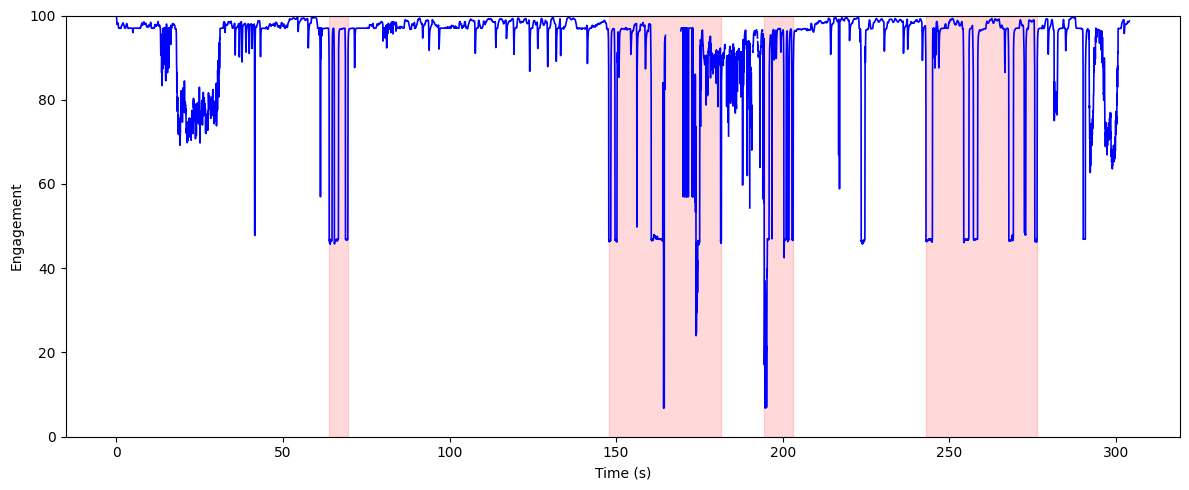

[stt] using openai-whisper


Device set to use cpu
Your max_length is set to 80, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)
Device set to use cpu
Device set to use cpu
Your max_length is set to 80, but your input_length is only 72. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)
Device set to use cpu


[report] PDF saved -> results\Phys 131-2_drops_report.pdf



## 📑 Analysis Report: Phys 131-2
### 🔻 Drop #01
- **Time:** 01:03 ~ 01:09 (5.6s)
- **Min Focus:** 45.7
- **📝 Summary:** We're going around the Sun rather than the Sun going around us in a sense. but at least, you know, we're going round the Sun . Of course, that's a relativity question. Galileo knows his relativity.
- **💬 Transcript:** *"but at least, you know, we're going around the Sun rather than the Sun going around us in a sense. Of course, that's a relativity question. And Galileo knows his relativity. He invented the law of"*

---
### 🔻 Drop #02
- **Time:** 02:27 ~ 03:01 (33.8s)
- **Min Focus:** 6.7
- **📝 Summary:** Tico Brachy took the data and Kepler formed the empirical laws that are distillation of this wonderful data . He says it was an amazing feat of experimental physics to get this data .
- **💬 Transcript:** *"to fit the data you don't have. That if somebody were to take more data later, your theory should still work for that data. So that's a really tall order for making a, a theory or a model of, of the data. And so basically, like, uh, so Tico Brachy took the data and Kepler formed the empirical laws that are distillation of this wonderful data that Tico Brachy took. He, you know, what's really important in the story from Tico Brachy's perspective is that it was a really high precision data, like it was, it was an amazing feat of experimental physics to get this data. And, and, you know,"*

---
### 🔻 Drop #03
- **Time:** 03:14 ~ 03:23 (8.7s)
- **Min Focus:** 6.8
- **📝 Summary:** The difference between a circle and an ellipse, you know, isn't that much. Especially if you think about the Earth's orbit, it's pretty circular. It's almost a perfect circle. I don't know. Um, so how is it that we form this law that, you say, most. orbits, not circular orbits .
- **💬 Transcript:** *"orbits, not circular orbits. And the difference between a circle and an ellipse, you know, isn't that much. Especially if you think about the Earth's orbit, it's pretty circular. It's almost a perfect circle. I don't know. Um, so how is it that we form this law that, you know, most"*

---
### 🔻 Drop #04
- **Time:** 04:03 ~ 04:36 (33.4s)
- **Min Focus:** 46.1
- **📝 Summary:** Point C is the focal point of the ellipse . The eccentricity is called something called the eccentricity or the major and minor axes .
- **💬 Transcript:** *"ellipse. Uh, yeah, how many of you studied ellipses in your high school? So you're comfortable with the major and minor axes and, um, what else do we have to know? We have to know something called the, or there's something called the eccentricity. Uh, there's this, oh, this, this, uh, point C. Uh, okay, hold on a second. So point C is the, um, focal point of the ellipse. And now it's slipping my mind. I think from the focal point, uh, maybe the focal point is such that if you look at any point on the ellipse,"*

---


In [12]:
# -*- coding: utf-8 -*-
import os, sys, time, json, math, subprocess, csv, base64
import cv2, numpy as np, mediapipe as mp
import matplotlib.pyplot as plt
from collections import deque
from IPython.display import display, HTML, Markdown, IFrame

# [NEW] Library for PDF generation
try:
    from reportlab.lib.pagesizes import letter
    from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
    from reportlab.lib.styles import getSampleStyleSheet
except ImportError:
    print("Error: 'reportlab' library is missing. Install it using: pip install reportlab")
    sys.exit(1)

# ==== Options ====
ENABLE_STT = True
SHOW_GRAPH = True
BIN_SEC = 5.0
FOCUS_THR = 40.0
ALPHA = 3.5
EAR_MIN_ABS = 0.16
W_EYE = 0.50; W_PUPIL = 0.10; W_HEADPITCH = 0.40
PUPIL_ALPHA = 2.0; PUI_WIN_SEC = 1.0; PUI_MIN = 0.002; PUI_MAX = 0.05
PITCH_START = 5.0; PITCH_MAX = 20.0

# ==== STT Setup ====
HAVE_WHISPER = False; HAVE_FASTER = False; HAVE_TRANS = False
if ENABLE_STT:
    try: from faster_whisper import WhisperModel; HAVE_FASTER = True
    except: pass
    try: import whisper; HAVE_WHISPER = True
    except: pass
    try: from transformers import pipeline; HAVE_TRANS = True
    except: pass

# ==== Global Vars ====
G_TIME=[]; G_DROWSINESS=[]; G_FOCUS=[]; G_NORM=[]; G_EYE_PX=[]; G_BLINK_RATE=[]; G_EVENTS=[]
G_PUPIL_NORM=[]; G_PUPIL_JITTER=[]; G_HEAD_PITCH=[]

# ==== Helpers ====
def _dist(p1,p2): return float(np.linalg.norm(p1[:2]-p2[:2]))
right_eye=[[33,133],[160,144],[159,145],[158,153]]; left_eye=[[263,362],[387,373],[386,374],[385,380]]
RIGHT_IRIS=[474,475,476,477]; LEFT_IRIS=[469,470,471,472]

def _normalized_opening(lms):
    r=[(159,145),(158,153),(160,144)]; l=[(386,374),(385,380),(387,373)]
    rd=np.mean([_dist(lms[a],lms[b]) for a,b in r]); ld=np.mean([_dist(lms[a],lms[b]) for a,b in l])
    w=max((_dist(lms[33],lms[133])+_dist(lms[263],lms[362]))/2.0, 1e-6)
    return (rd+ld)/2.0/w, (rd+ld)/2.0

def _scale_from_norm(norm_val, open_base, closed_base, alpha=ALPHA, prev=None):
    if norm_val <= closed_base: return 100.0
    if norm_val >= open_base: return 0.0
    ratio = np.clip((norm_val-closed_base)/max(open_base-closed_base,1e-6), 0.0, 1.0)
    val = (1.0-ratio)**alpha * 100.0
    return float(prev*0.9+val*0.1) if prev is not None else float(val)

def _pupil_metrics(lms):
    def _ic(idxs): pts=np.array([lms[i][:2] for i in idxs]); return pts.mean(0), np.mean([np.linalg.norm(p-pts.mean(0)) for p in pts])
    cR, rR = _ic(RIGHT_IRIS); cL, rL = _ic(LEFT_IRIS)
    w = max((_dist(lms[33],lms[133])+_dist(lms[263],lms[362]))/2.0, 1e-6)
    return (rR+rL)/2.0/w, (cR+cL)/2.0, w

def _pupil_size_score(r_norm, base_open, base_min):
    ratio = np.clip((r_norm-base_min)/max(base_open-base_min, 1e-6), 0.0, 1.0)
    return float((1.0-ratio)**PUPIL_ALPHA * 100.0)

def _pui_score(center_deque, eye_width):
    if len(center_deque)<3: return 0.0
    std = np.std(np.array(center_deque), axis=0)
    norm = np.clip((float(np.linalg.norm(std))/max(eye_width,1e-6) - PUI_MIN)/max(PUI_MAX-PUI_MIN,1e-6), 0.0, 1.0)
    return float(norm * 100.0)

def _head_pitch_deg(lms, w, h):
    try:
        ip=np.array([lms[1][:2],lms[152][:2],lms[263][:2],lms[33][:2],lms[291][:2],lms[61][:2]],dtype=np.float64)
        mp=np.array([(0,0,0),(0,-330,-65),(-225,170,-135),(225,170,-135),(-150,-150,-125),(150,-150,-125)],dtype=np.float64)
        cam=np.array([[w,0,w/2.0],[0,w,h/2.0],[0,0,1]],dtype=np.float64)
        _,r,_=cv2.solvePnP(mp,ip,cam,np.zeros((4,1)),flags=cv2.SOLVEPNP_ITERATIVE)
        return float(math.degrees(math.atan2(-cv2.Rodrigues(r)[0][2,0], math.sqrt(cv2.Rodrigues(r)[0][0,0]**2+cv2.Rodrigues(r)[0][1,0]**2))))
    except: return 0.0

def _pitch_score(p): return float(np.clip((max(0,p)-PITCH_START)/(PITCH_MAX-PITCH_START),0,1)*100.0)

# ==== STT & Analysis ====
def extract_audio(vp, wp):
    try: subprocess.run(["ffmpeg","-y","-i",vp,"-vn","-ac","1","-ar","16000","-f","wav",wp],check=True,stdout=subprocess.PIPE,stderr=subprocess.PIPE); return True
    except: print("[stt] ffmpeg failed"); return False

def transcribe(wp):
    res=[]
    try:
        if HAVE_FASTER: 
            print("[stt] using faster-whisper")
            for s in WhisperModel("base",compute_type="int8").transcribe(wp,vad_filter=True)[0]: res.append({"start":s.start,"end":s.end,"text":s.text.strip()})
        elif HAVE_WHISPER:
            print("[stt] using openai-whisper")
            for s in whisper.load_model("base").transcribe(wp,fp16=False)["segments"]: res.append({"start":s["start"],"end":s["end"],"text":s["text"].strip()})
    except Exception as e: print(f"[stt] error: {e}")
    return res

def summarize(txt):
    if not txt: return ""
    try: return pipeline("summarization",model="sshleifer/distilbart-cnn-12-6")(txt[:1200],max_length=80,min_length=20,do_sample=False)[0]["summary_text"].strip()
    except: return (txt[:160]+"...") if len(txt)>160 else txt

def _find_drops(t,f,d,min_dur=1.5):
    drops=[]; in_drop=False; st=0; rec_st=None
    t=np.array(t); f=np.nan_to_num(f,nan=100); d=np.nan_to_num(d,nan=0)
    for i in range(len(t)):
        bad = (f[i]<50.0) or (d[i]>80.0)
        if not in_drop and bad: in_drop=True; st=t[i]; rec_st=None
        elif in_drop:
            if bad: rec_st=None
            elif f[i]>=60.0:
                if rec_st is None: rec_st=t[i]
                elif t[i]-rec_st>=10.0:
                    if rec_st-st>=min_dur: drops.append({"start":float(st),"end":float(rec_st),"min_focus":float(np.min(f[(t>=st)&(t<=rec_st)]))})
                    in_drop=False
    if in_drop and t[-1]-st>=min_dur: drops.append({"start":float(st),"end":float(t[-1]),"min_focus":float(np.min(f[t>=st]))})
    return drops

def _save_pdf(dips, texts, out_dir, base):
    path=os.path.join(out_dir,f"{base}_drops_report.pdf")
    doc=SimpleDocTemplate(path,pagesize=letter); sty=getSampleStyleSheet(); story=[Paragraph(f"Focus Drop Report: {base}",sty['Title']),Spacer(1,12)]
    if not dips: story.append(Paragraph("No drops detected.",sty['Normal']))
    for i,d in enumerate(dips,1):
        story.append(Paragraph(f"Drop #{i:02d} | {int(d['start']//60):02d}:{int(d['start']%60):02d}~{int(d['end']//60):02d}:{int(d['end']%60):02d} | Min Focus: {d['min_focus']:.1f}",sty['Heading2']))
        if texts:
            item=texts.get(f"drop_{i:02d}",{})
            if item.get("summary"): story.append(Paragraph(f"<b>Summary:</b> {item['summary']}",sty['Normal'])); story.append(Spacer(1,6))
            if item.get("text"): story.append(Paragraph(f"<b>Transcript:</b> {item['text']}",sty['BodyText']))
        story.append(Spacer(1,12)); story.append(Paragraph("-"*60,sty['Normal'])); story.append(Spacer(1,12))
    try: doc.build(story); print(f"[report] PDF saved -> {path}"); return path
    except: print("[report] PDF generation failed"); return None

def _fmt_time(x): return f"{int(x)//60:02d}:{int(x)%60:02d}"

# ==== Main ====
def analyze_video(video_path, out_dir="results"):
    global G_TIME, G_DROWSINESS, G_FOCUS, G_NORM, G_EYE_PX, G_BLINK_RATE, G_EVENTS, G_PUPIL_NORM, G_PUPIL_JITTER, G_HEAD_PITCH
    G_TIME=[]; G_DROWSINESS=[]; G_FOCUS=[]; G_NORM=[]; G_EYE_PX=[]; G_BLINK_RATE=[]; G_EVENTS=[]; G_PUPIL_NORM=[]; G_PUPIL_JITTER=[]; G_HEAD_PITCH=[]
    
    os.makedirs(out_dir, exist_ok=True)
    base=os.path.splitext(os.path.basename(video_path))[0]
    fm=mp.solutions.face_mesh.FaceMesh(min_detection_confidence=0.3, refine_landmarks=True)
    cap=cv2.VideoCapture(video_path)
    if not cap.isOpened(): raise RuntimeError(f"cannot open {video_path}")
    
    fps=cap.get(cv2.CAP_PROP_FPS) or 25.0
    tot=int(cap.get(cv2.CAP_PROP_FRAME_COUNT) or 0)
    
    eh=deque(maxlen=int(fps*60))
    bt=deque()
    cb_q=deque(maxlen=max(3, int(PUI_WIN_SEC*fps)))
    
    ov=[]; pv=[]
    for _ in range(int(fps)):
        ok,f=cap.read(); 
        if not ok: break
        lms=_run_facemesh(fm,f)
        if lms is not None: 
            ov.append(_normalized_opening(lms)[0])
            try: pv.append(_pupil_metrics(lms)[0])
            except: pass
            
    ob=max(np.median(ov) if ov else 0.3, 0.18); cb=max(ob*0.25, 0.02)
    pob=np.median(pv) if pv else 0.04; pmb=max(pob*0.5,0.01)
    
    cap.set(cv2.CAP_PROP_POS_FRAMES,0)
    ema=None; blk=False
    
    for i in range(tot):
        ok,f=cap.read()
        if not ok: break
        t=i/fps; lms=_run_facemesh(fm,f)
        if lms is not None:
            h,w=f.shape[:2]; n,px=_normalized_opening(lms)
            ema=n if ema is None else ema*0.8+n*0.2
            eh.append(n)
            if i%int(fps*2)==0 and len(eh)>int(fps):
                rm=np.percentile(eh,95)
                if rm>ob: ob=ob*0.8+rm*0.2
                elif rm<ob and n>EAR_MIN_ABS: ob=ob*0.98+rm*0.02
                cb=max(ob*0.25,0.02)
            
            dr=100.0 if ema<EAR_MIN_ABS else _scale_from_norm(ema,ob,cb,prev=None)
            
            ps=0.0; pui=0.0; rns=np.nan
            try:
                rn,c,ew=_pupil_metrics(lms); rns=rn
                cb_q.append(c) 
                ps=_pupil_size_score(rn,pob,pmb); pui=_pui_score(cb_q,ew)
                if ps<10: pob=pob*0.99+rn*0.01
                if ps>90: pmb=pmb*0.99+rn*0.01
            except: pass
            
            pch=_head_pitch_deg(lms,w,h); pcs=_pitch_score(pch)
            fd=np.clip(W_EYE*dr + W_PUPIL*(0.7*ps+0.3*pui) + W_HEADPITCH*pcs, 0, 100)
            foc=max(0,100-fd)
            
            if fd>80 and not blk: blk=True
            elif fd<30 and blk: blk=False; bt.append(t); G_EVENTS.append({"t":t,"type":"blink"})
            while bt and bt[0]<t-60: bt.popleft()
            
            G_TIME.append(t); G_DROWSINESS.append(fd); G_FOCUS.append(foc)
            G_NORM.append(ema); G_EYE_PX.append(px); G_BLINK_RATE.append(len(bt)); G_PUPIL_NORM.append(rns); G_PUPIL_JITTER.append(pui); G_HEAD_PITCH.append(pch)
        else:
            for l in [G_DROWSINESS,G_FOCUS,G_NORM,G_EYE_PX,G_PUPIL_NORM,G_PUPIL_JITTER,G_HEAD_PITCH]: l.append(np.nan)
            G_TIME.append(t); G_BLINK_RATE.append(G_BLINK_RATE[-1] if G_BLINK_RATE else 0)
            
        if i%int(fps*5)==0: print(f"[progress] {i}/{tot} ({(i/tot)*100:.1f}%)")
        
    cap.release(); fm.close()
    
    dips=_find_drops(G_TIME,G_FOCUS,G_DROWSINESS,min_dur=5.0)
    
    # 1. Show Graph
    plt.figure(figsize=(12,5)); plt.plot(G_TIME,G_FOCUS,color="blue",lw=1.2)
    for d in dips: plt.axvspan(d["start"],d["end"],color="red",alpha=0.15)
    plt.xlabel("Time (s)"); plt.ylabel("Engagement"); plt.ylim(0,100); plt.tight_layout()
    plt.savefig(os.path.join(out_dir,f"{base}_focus.png")); 
    if SHOW_GRAPH: plt.show()
    plt.close()
    
    # 2. Prepare Text Data
    dtxt=None
    if ENABLE_STT:
        wp=os.path.join(out_dir,f"{base}.wav")
        if extract_audio(video_path,wp):
            segs=transcribe(wp)
            if segs:
                dtxt={}
                for i,d in enumerate(dips,1):
                    ls=[s for s in segs if s["end"]>=d["start"]-1 and s["start"]<=d["end"]+1]
                    raw=" ".join([s["text"] for s in ls]).strip()
                    dtxt[f"drop_{i:02d}"]={"start":d["start"],"end":d["end"],"min":d["min_focus"],"text":raw,"summary":summarize(raw)}
    
    # 3. Save PDF
    pdf_path = _save_pdf(dips, dtxt, out_dir, base)
    
    # 4. [NEW] Display Content Immediately in Notebook (Markdown) 
    # This ensures you see the data even if PDF viewer fails
    print("\n" + "="*50)
    md_output = f"## 📑 Analysis Report: {base}\n"
    if not dips:
        md_output += "> **✅ No focus drops detected.** Excellent engagement!\n"
    else:
        for i, d in enumerate(dips, 1):
            dur = d['end'] - d['start']
            md_output += f"### 🔻 Drop #{i:02d}\n"
            md_output += f"- **Time:** {_fmt_time(d['start'])} ~ {_fmt_time(d['end'])} ({dur:.1f}s)\n"
            md_output += f"- **Min Focus:** {d['min_focus']:.1f}\n"
            if dtxt:
                item = dtxt.get(f"drop_{i:02d}", {})
                if item.get("summary"):
                    md_output += f"- **📝 Summary:** {item['summary']}\n"
                if item.get("text"):
                    md_output += f"- **💬 Transcript:** *\"{item['text']}\"*\n"
            md_output += "\n---\n"
    
    display(Markdown(md_output))

    # 5. [NEW] PDF Link Button (Reliable Fallback)
    if pdf_path and os.path.exists(pdf_path):
        try:
            # Create a simple Open Button using relative path
            rel_path = os.path.relpath(pdf_path)
            # Encode for link just in case
            with open(pdf_path, "rb") as f:
                b64 = base64.b64encode(f.read()).decode('utf-8')
            
            html_code = f'''
            <div style="margin-top: 20px; padding: 15px; background-color: #f8f9fa; border: 1px solid #ddd; border-radius: 8px; text-align: center;">
                <p style="margin-bottom: 10px; font-weight: bold; color: #555;">PDF Report Generated</p>
                <a href="data:application/pdf;base64,{b64}" download="{base}_report.pdf" target="_blank" 
                   style="background-color: #d32f2f; color: white; padding: 10px 20px; text-decoration: none; border-radius: 5px; font-weight: bold; font-family: sans-serif;">
                   📄 Click to Open PDF Report
                </a>
            </div>
            '''
            display(HTML(html_code))
        except Exception as e:
            print(f"PDF Link Error: {e}")

if __name__=="__main__":
    analyze_video("Phys 131-2.mp4")

In [3]:
!pip install reportlab





   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.0 MB 1.1 MB/s eta 0:00:02
   ----------------------- ---------------- 1.1/2.0 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 15.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\kwsay\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
!pip install mediapipe

  Using cached mediapipe-0.10.21-cp311-cp311-win_amd64.whl.metadata (10 kB)
  Using cached jax-0.7.2-py3-none-any.whl.metadata (13 kB)
  Using cached jaxlib-0.7.2-cp311-cp311-win_amd64.whl.metadata (1.4 kB)
  Using cached matplotlib-3.10.6-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached opencv_contrib_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached sounddevice-0.5.2-py3-none-win_amd64.whl.metadata (1.6 kB)
  Using cached cffi-2.0.0-cp311-cp311-win_amd64.whl.metadata (2.6 kB)
  Using cached ml_dtypes-0.5.3-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
  Using cached jax-0.7.1-py3-none-any.whl.metadata (13 kB)
  Using cached jaxlib-0.7.1-cp311-cp311-win_amd64.whl.metadata (1.3 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
INFO: pip is looking at multiple versions of opencv-contrib-pyth


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\kwsay\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
